In [2]:
## load all liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Read the dataset (step1: collect the dataset)
df = pd.read_csv ('Price.csv')
df

,Area (sqft),Price ($)
0,2000,88600
1,1600,71600
2,1980,93300
3,1840,84300
4,1710,80600
5,1550,75200
6,1470,69700
7,1710,82000
8,1540,69400
9,1620,78700


In [4]:

# step 2: divide the dataset into dependent and independent  features
i = df[["Area (sqft)"]]  # 2D

d = df["Price ($)"]   # 1D


In [5]:
# Step3: to check the datatype and nan values of each column of independent featurse

i.info()
i.isnull().sum()# nam value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Area (sqft)  40 non-null     int64
dtypes: int64(1)
memory usage: 448.0 bytes


Area (sqft)    0
dtype: int64

In [20]:
# train and test split 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (i, d, test_size = .10,random_state=1)

#i is divide into 2 parts x_train(90 %)and x_test(10 %)
#d is divide into 2 parts y_train and y_test
x_test



,Area (sqft)
2,1980
31,1760
3,1840
21,1640


In [7]:

from sklearn.linear_model import LinearRegression
lnr = LinearRegression()   # create object of Linear regression
lnr.fit (x_train, y_train ) # fit fxn is used to give training to model/machine 

m=lnr.coef_  # slope
c=lnr.intercept_   #intersecpt
print("slope",m)
print("intercept",c)


slope [35.81814053]
intercept 19952.946806273918


In [8]:
x_test

,Area (sqft)
22,1900
20,1900
25,1590
4,1710


In [9]:
x_test

,Area (sqft)
22,1900
20,1900
25,1590
4,1710


In [10]:
#print("x_test",x_test)
predicted_y = lnr.predict(x_test)# test the model
print("predicted y records:",predicted_y)
print("real answers",y_test)

predicted y records: [88007.41381775 88007.41381775 76903.79025272 81201.96711661]
real answers 22    92100
20    82600
25    75900
4     80600
Name: Price ($), dtype: int64


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")

print('Mean Absolute Error(MAE):', mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error(MSE):', mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, predicted_y)))

RMSE is:-
Mean Absolute Error(MAE): 2776.4393423321126
Mean Squared Error(MSE): 11839836.284120673
Root Mean Squared Error(RMSE): 3440.906317254318


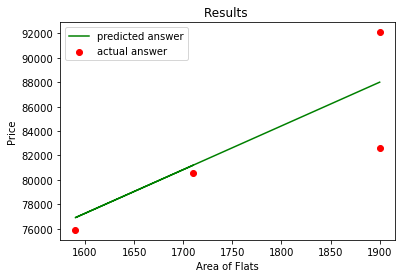

In [12]:
plt.scatter(x_test, y_test, color = 'red',label="actual answer")  
plt.plot(x_test, predicted_y, color = 'green',label='predicted answer')
plt.legend()
plt.title ('Results ')
plt.xlabel('Area of Flats')
plt.ylabel('Price')
plt.show()

In [13]:
#explain equation now y=mx+c
m=lnr.coef_  # slope
c=lnr.intercept_   #intersecpt
print(" slope:",m) #slope
print("intercept",c)  

y=m*1900+c  #Here i is x as defined above
print("price of land",y)


rr=lnr.predict([[1900]])
print("rr",rr)
#y= m*1900+c

 slope: [35.81814053]
intercept 19952.946806273918
price of land [88007.41381775]
rr [88007.41381775]
